In [1]:
!pip install minisom
!pip install matplotlib
!pip install pandas

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=294e3483c44d0afeb81cdc61ecaa5d635c81379da16ac3f07d9308c36d9a21e1
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [2]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

In [3]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Normalize the data to [0, 1] range
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [4]:
# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=data.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize the weights
som.random_weights_init(data)

# Train the SOM
som.train_random(data, num_iteration=100)

AttributeError: 'MiniSom' object has no attribute 'x'

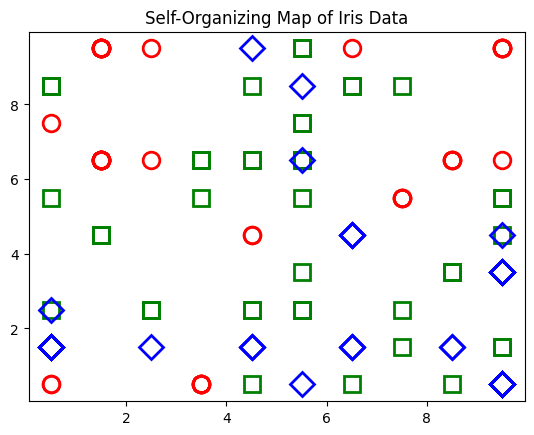

In [5]:
# Create a color map for the different species
target_names = iris.target_names
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']

# Map each data point to its BMU (Best Matching Unit)
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # place a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)

# Annotate the plot
plt.title('Self-Organizing Map of Iris Data')
plt.xlim([0, som.x])
plt.ylim([0, som.y])
plt.grid()

# Show the plot
plt.show()

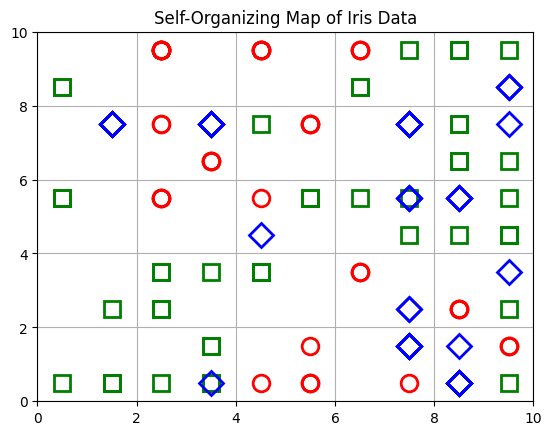

In [6]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Normalize the data to [0, 1] range
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=data.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize the weights
som.random_weights_init(data)

# Train the SOM
som.train_random(data, num_iteration=100)

# Create a color map for the different species
target_names = iris.target_names
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']

# Map each data point to its BMU (Best Matching Unit)
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # place a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)

# Annotate the plot
plt.title('Self-Organizing Map of Iris Data')
plt.xlim([0, som.get_weights().shape[0]])
plt.ylim([0, som.get_weights().shape[1]])
plt.grid()

# Show the plot
plt.show()

array([['Red', 'Small', 'Circle'],
       ['Blue', 'Large', 'Square'],
       ['Green', 'Medium', 'Triangle'],
       ['Red', 'Large', 'Circle'],
       ['Blue', 'Small', 'Square'],
       ['Green', 'Medium', 'Circle']], dtype='<U8')

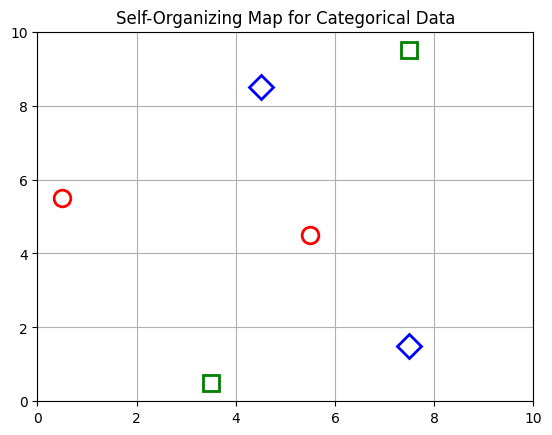

In [7]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Create a sample categorical dataset
data = np.array([
    ['Red', 'Small', 'Circle'],
    ['Blue', 'Large', 'Square'],
    ['Green', 'Medium', 'Triangle'],
    ['Red', 'Large', 'Circle'],
    ['Blue', 'Small', 'Square'],
    ['Green', 'Medium', 'Circle']
])

display(data)
# Create a target variable for visualization purposes
target = np.array([0, 1, 2, 0, 1, 2])

# Encode the categorical data
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(data).toarray()


# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=data_encoded.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize the weights
som.random_weights_init(data_encoded)

# Train the SOM
som.train_random(data_encoded, num_iteration=100)


# Create a color map for the different categories
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']

# Map each data point to its BMU (Best Matching Unit)
for cnt, xx in enumerate(data_encoded):
    w = som.winner(xx)  # getting the winner
    # place a marker on the winning position for the sample xx
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)

# Annotate the plot
plt.title('Self-Organizing Map for Categorical Data')
plt.xlim([0, som.get_weights().shape[0]])
plt.ylim([0, som.get_weights().shape[1]])
plt.grid()

# Show the plot
plt.show()

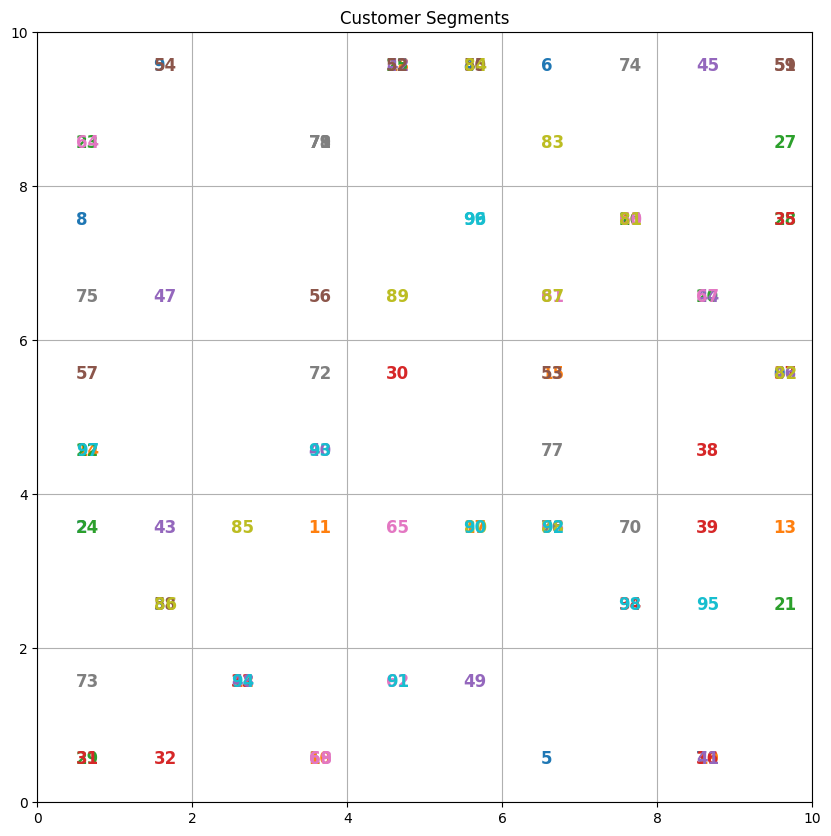

In [8]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generate a sample customer dataset
np.random.seed(42)
data = np.random.rand(100, 3)  # 100 customers with 3 features (age, income, spending score)

# Normalize the data to [0, 1] range
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Initialize and train the SOM
som = MiniSom(x=10, y=10, input_len=data_normalized.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_normalized)
som.train_random(data_normalized, num_iteration=100)

# Visualize the results
plt.figure(figsize=(10, 10))
for i, x in enumerate(data_normalized):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i), color=plt.cm.tab10(i // 10), fontdict={'weight': 'bold', 'size': 12})

plt.title('Customer Segments')
plt.xlim([0, som.get_weights().shape[0]])
plt.ylim([0, som.get_weights().shape[1]])
plt.grid()
plt.show()

In [13]:
#Initialize the SOM
som = MiniSom(x=10, y=10, input_len=data_normalized.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize the weights
som.random_weights_init(data_normalized)

# Train the SOM
som.train_random(data_normalized, num_iteration=100)

# Get the BMU for each data point
bmus = np.array([som.winner(x) for x in data_normalized])
bmu_indices = np.array([x[0] * som.y + x[1] for x in bmus])

# Perform hierarchical clustering on the SOM weights
weights = som.get_weights().reshape(-1, data_normalized.shape[1])
Z = linkage(weights, method='ward')
cluster_labels = fcluster(Z, t=5, criterion='maxclust')

# Map cluster labels to the original data points
data_cluster_labels = cluster_labels[bmu_indices]


# Create a color map for the clusters
colors = ['r', 'g', 'b', 'c', 'm']  # Add more colors if needed
plt.figure(figsize=(10, 10))
for cnt, xx in enumerate(data_normalized):
    w = som.winner(xx)  # getting the winner
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None',
             markeredgecolor=colors[data_cluster_labels[cnt] - 1], markersize=12, markeredgewidth=2)

plt.title('Self-Organizing Map Clustering of Iris Data (5 Clusters)')
plt.xlim([0, som.get_weights().shape[0]])
plt.ylim([0, som.get_weights().shape[1]])
plt.grid()
plt.show()

# Calculate the silhouette score to evaluate the clustering quality
silhouette_avg = silhouette_score(data_normalized, data_cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

AttributeError: 'MiniSom' object has no attribute 'y'